## Assignment 1: Machine Learning Methods

### Tanveer Akram | a1904700

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad).
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

### 1. Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
# Read the dataset from a CSV file using Pandas Data Frame
data = pd.read_csv('ObesityDataSet.csv')

#Workshop 3

In [ ]:
#List the header of the columns
data.columns

#Workshop 3

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### 2. Analyse and Visualize the Data

In [ ]:
#Finding the number of rows and columns to identify the size of the dataset
print("Number of rows and columns:", data.shape)

#Workshop 3

Number of rows and columns: (2111, 17)


In [ ]:
#A little more data exploration to understand the data types

#Finding Categorical Data
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

#Finding Numerical Data
decimal = [var_1 for var_1 in data.columns if data[var_1].dtype=='float64']

print('\n\nThere are {} float variables\n'.format(len(decimal)))
print('The Numerical variables are :\n\n', decimal)

#Workshop 3

There are 9 categorical variables

The categorical variables are :

 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


There are 8 float variables

The Numerical variables are :

 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [ ]:
#Finding the values that each categorical data has
for column in categorical:

    unique_values = np.unique(data[column])

    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

    #Workshop 3

Unique values for column 'Gender':
['Female' 'Male']

Unique values for column 'family_history_with_overweight':
['no' 'yes']

Unique values for column 'FAVC':
['no' 'yes']

Unique values for column 'CAEC':
['Always' 'Frequently' 'Sometimes' 'no']

Unique values for column 'SMOKE':
['no' 'yes']

Unique values for column 'SCC':
['no' 'yes']

Unique values for column 'CALC':
['Always' 'Frequently' 'Sometimes' 'no']

Unique values for column 'MTRANS':
['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']

Unique values for column 'NObeyesdad':
['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']



In [ ]:
#Checking any null or missing values

df_missing=pd.DataFrame((round(100*(data.isnull().sum()/len(data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

#Workshop 4

missing
Gender                              0.0
SMOKE                               0.0
MTRANS                              0.0
CALC                                0.0
TUE                                 0.0
FAF                                 0.0
SCC                                 0.0
CH2O                                0.0
CAEC                                0.0
Age                                 0.0
NCP                                 0.0
FCVC                                0.0
FAVC                                0.0
family_history_with_overweight      0.0
Weight                              0.0
Height                              0.0
NObeyesdad                          0.0

In [ ]:
#Function to create column for BMI
def calculate_bmi(weight_kg, height_m):
    bmi = weight_kg / (height_m ** 2)
    return bmi

data['BMI'] = calculate_bmi(data['Weight'], data['Height'])

#Workshop 3 Creating a function

In [ ]:
# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25.0:
        return 'Normal'
    elif 25.0 <= bmi < 30.0:
        return 'Overweight'
    elif 30.0 <= bmi < 35.0:
        return 'Obesity I'
    elif 35.0 <= bmi < 40.0:
        return 'Obesity II'
    else:
        return 'Obesity III'

#Creating a BMI_Category column for analysis
data['BMI_Category'] = data['BMI'].apply(categorize_bmi)

#Workshop 3 Creating a function

####Visualization


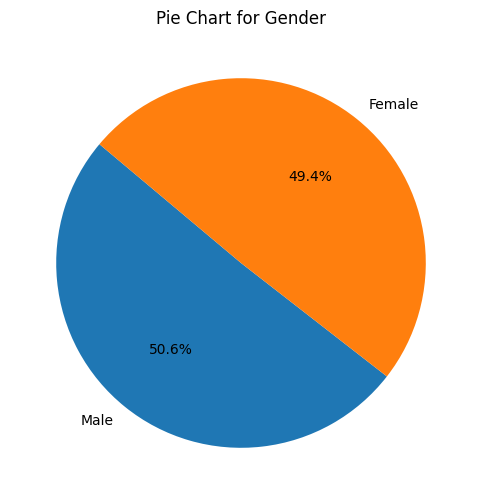

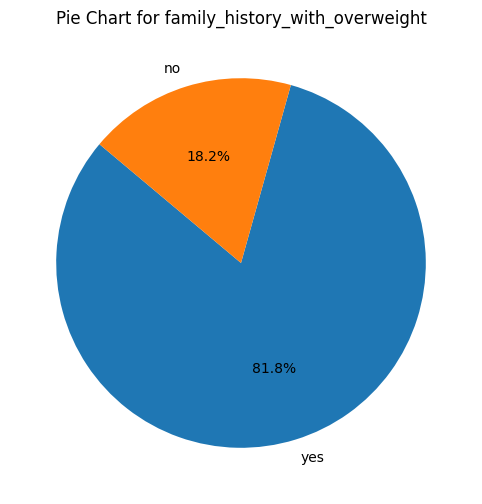

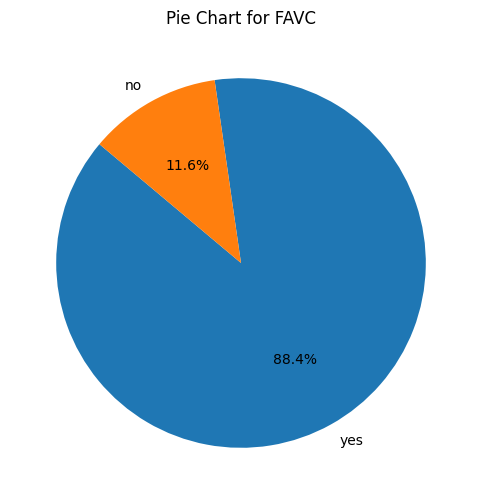

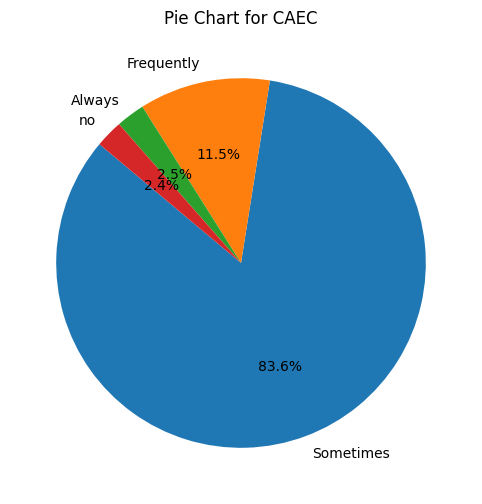

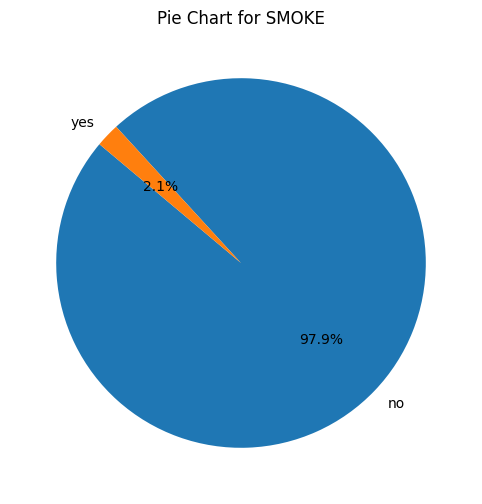

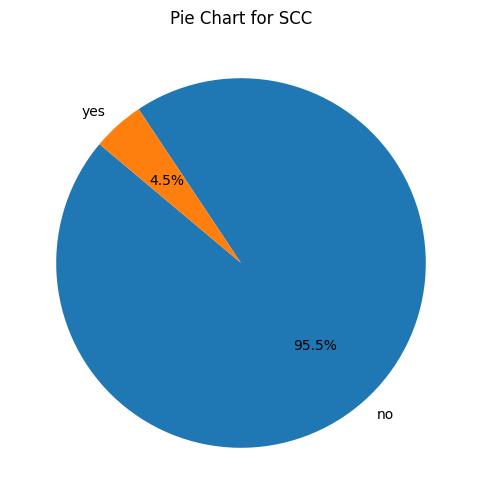

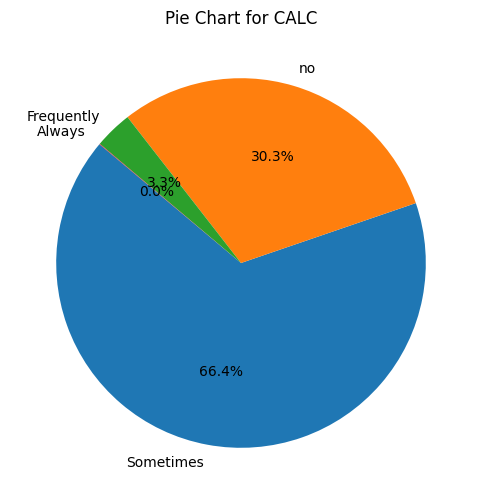

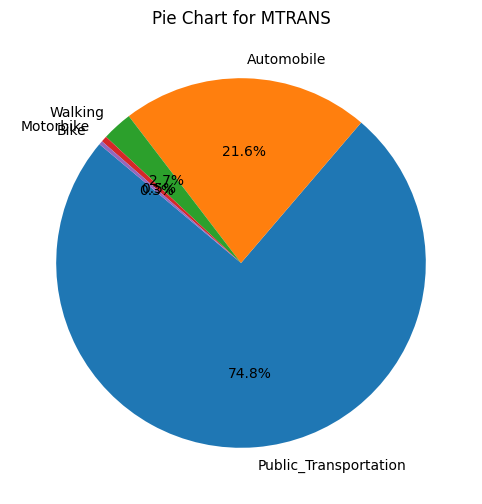

In [ ]:
#Checking all the categorical data distribution
for i in categorical:
    if i != "NObeyesdad":
        plt.figure(figsize=(8, 6))
        data[i].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title("Pie Chart for {}".format(i))
        plt.ylabel('')
        plt.show()


#Workshop 3

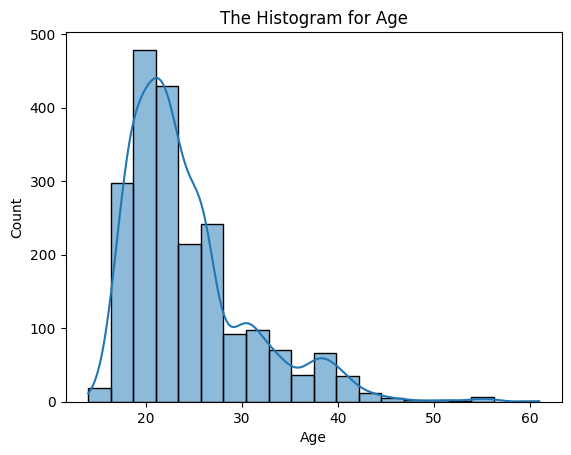

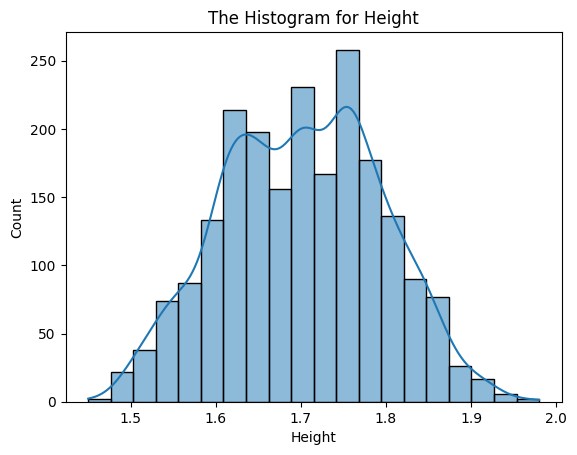

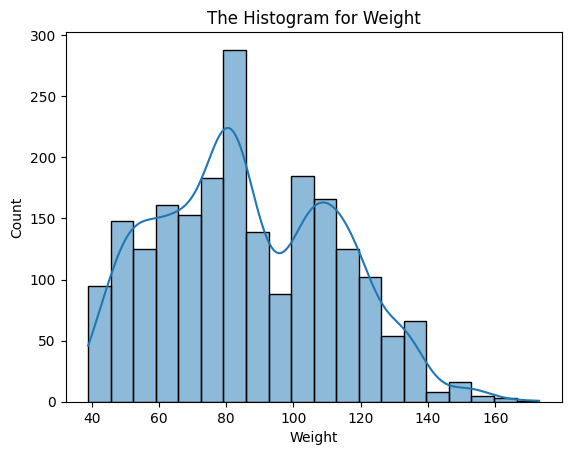

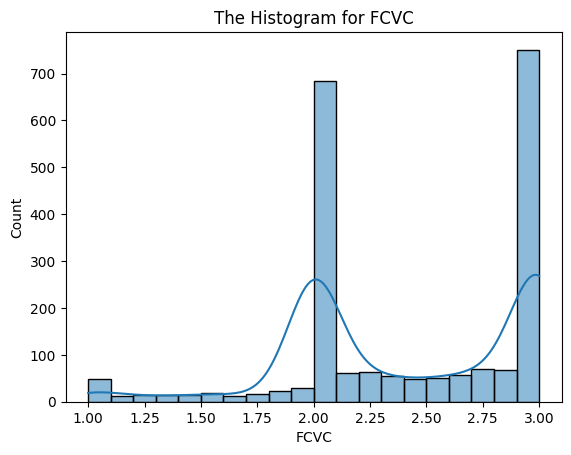

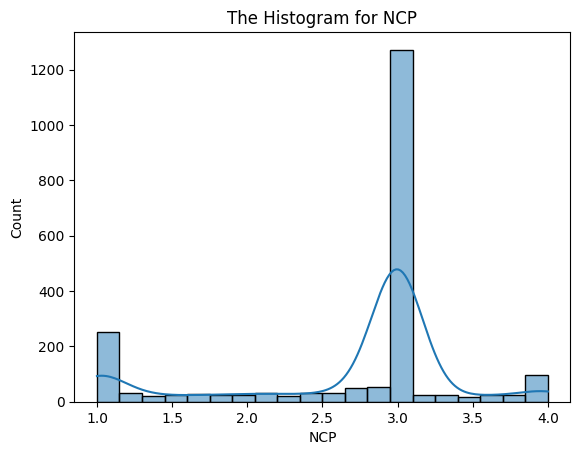

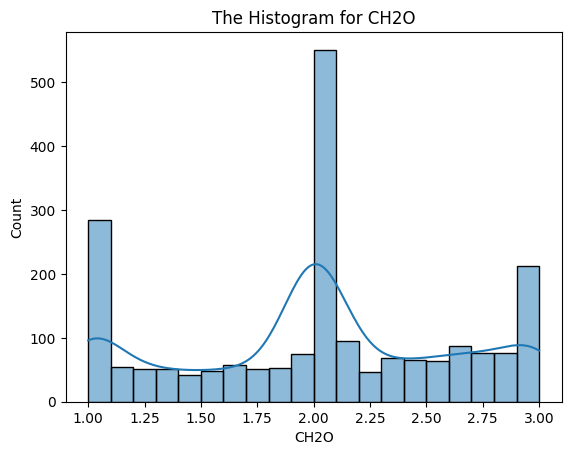

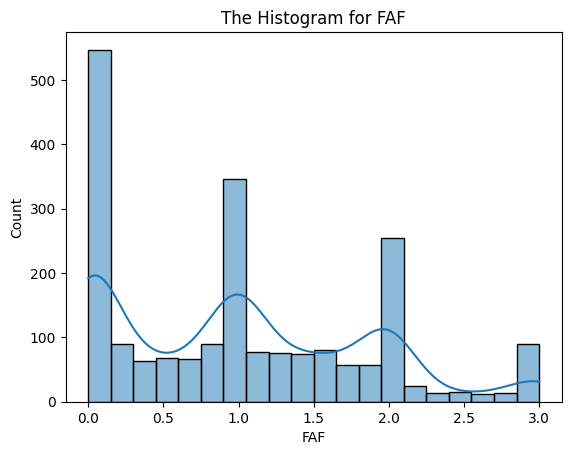

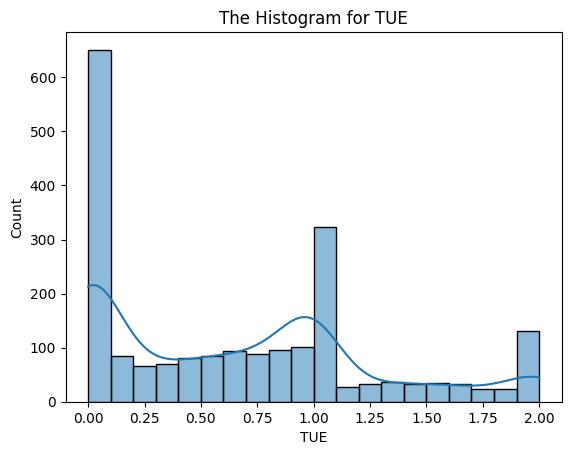

In [ ]:
#Checking all the Numerical data distribution
for i in decimal:

    sns.histplot(x=data[i], bins=20, kde=True)
    plt.title("The Histogram for {}".format(i))
    plt.show()

#Workshop 3
#Ref [1] for kde=True

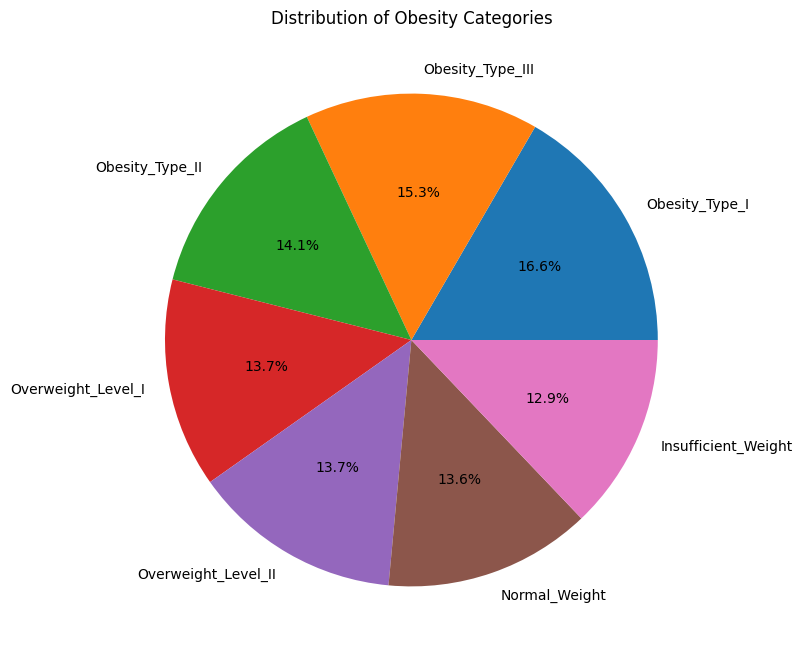

In [ ]:
# Extract 'NObeyesdad'
NObeyesdad = data['NObeyesdad']

# Plot a pie chart
plt.figure(figsize=(8, 8))
NObeyesdad.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Obesity Categories')
plt.ylabel('')
plt.show()

#Workshop 3

In [ ]:
#This is to order it according to the BMI Categories
order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II","Obesity_Type_I","Obesity_Type_II","Obesity_Type_III"]

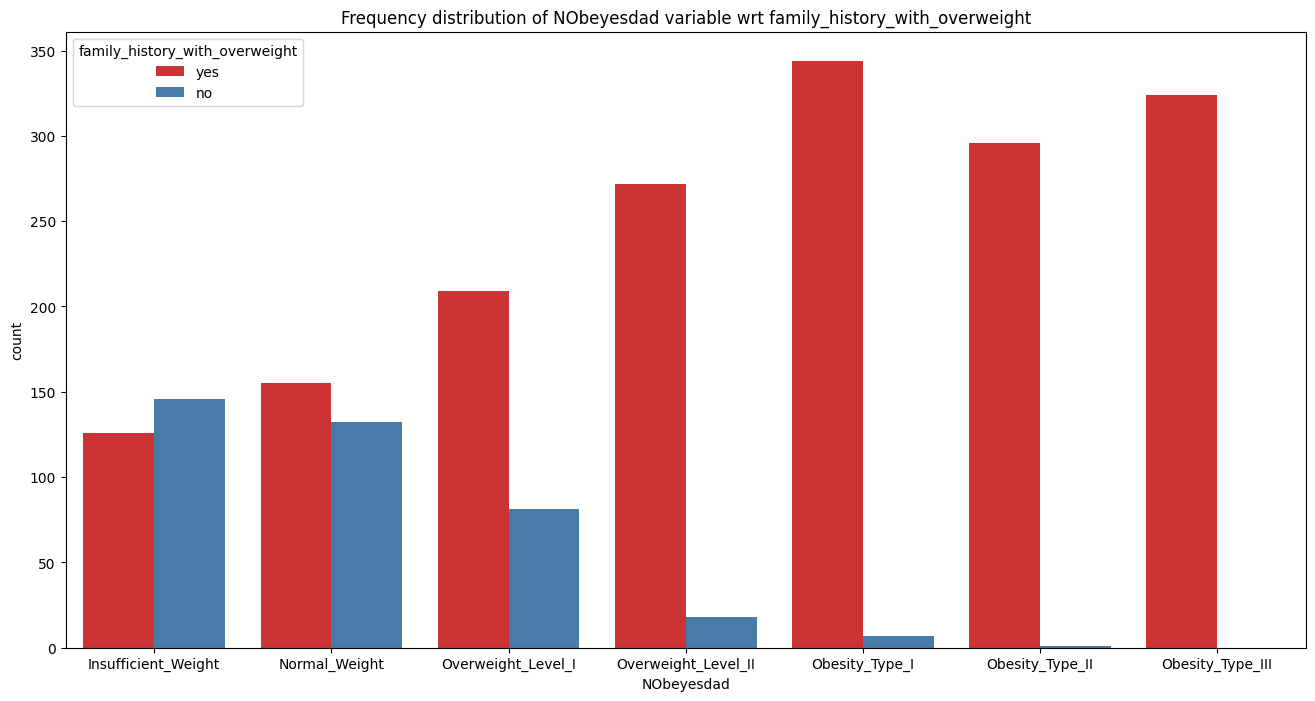

In [ ]:
#PLOT NObeyesdad vs family_history_with_overweight
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="family_history_with_overweight", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt family_history_with_overweight")
plt.show()

#Workshop 3

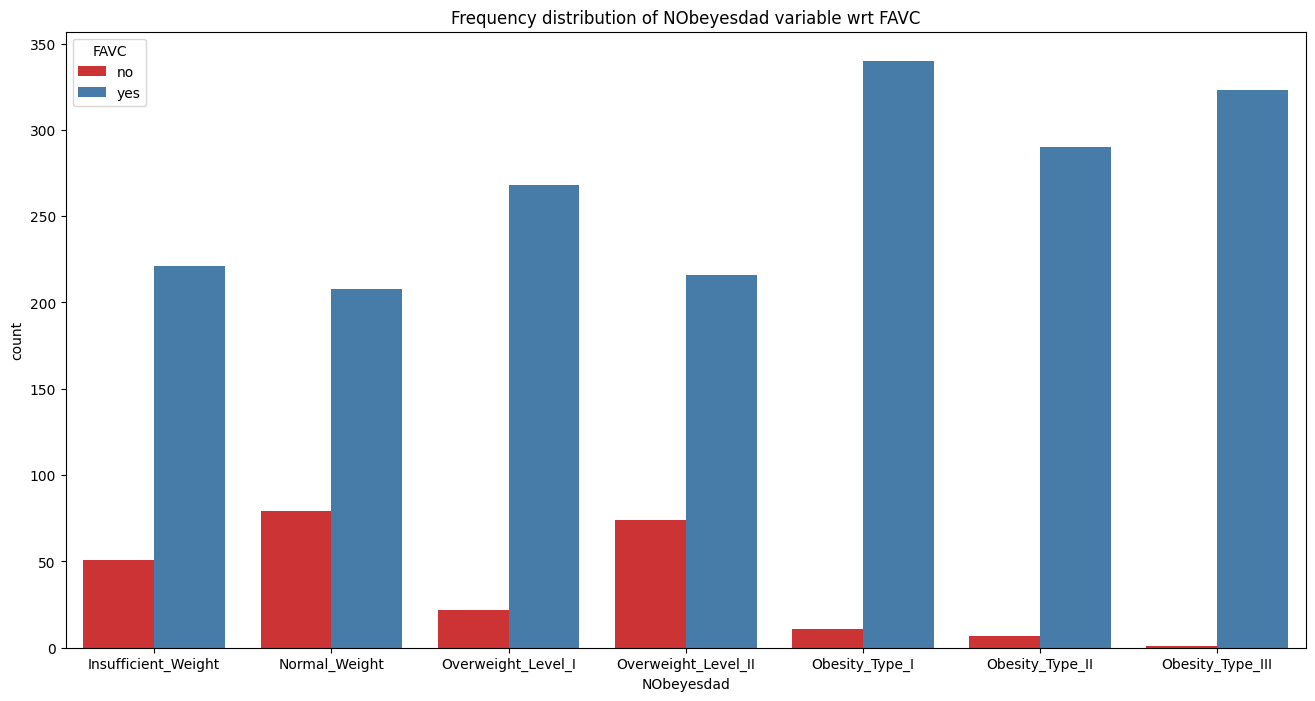

In [ ]:
#PLOT NObeyesdad vs Frequent consumption of high caloric food (FAVC)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="FAVC", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt FAVC")
plt.show()

#Workshop 3
#Ref [2] for order

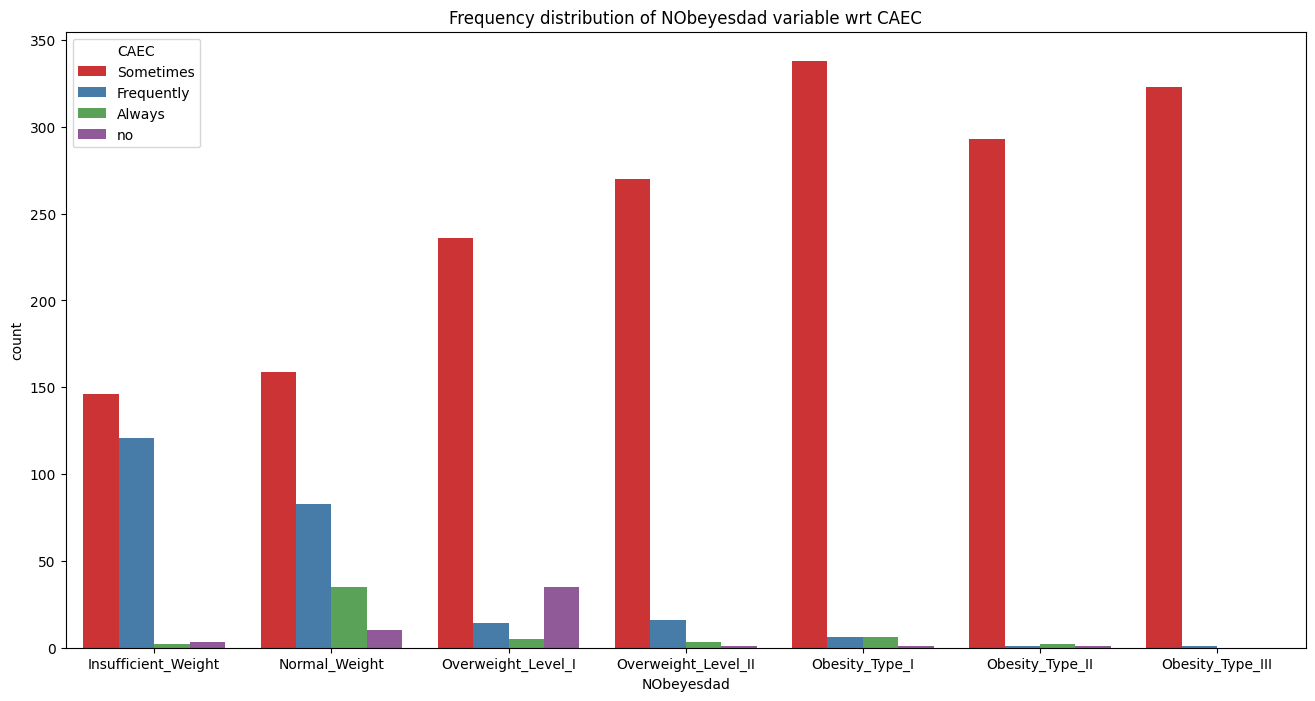

In [ ]:
#PLOT NObeyesdad vs Consumption of food between meals (CAEC)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="CAEC", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt CAEC")
plt.show()

#Workshop 3
#Ref [2] for order

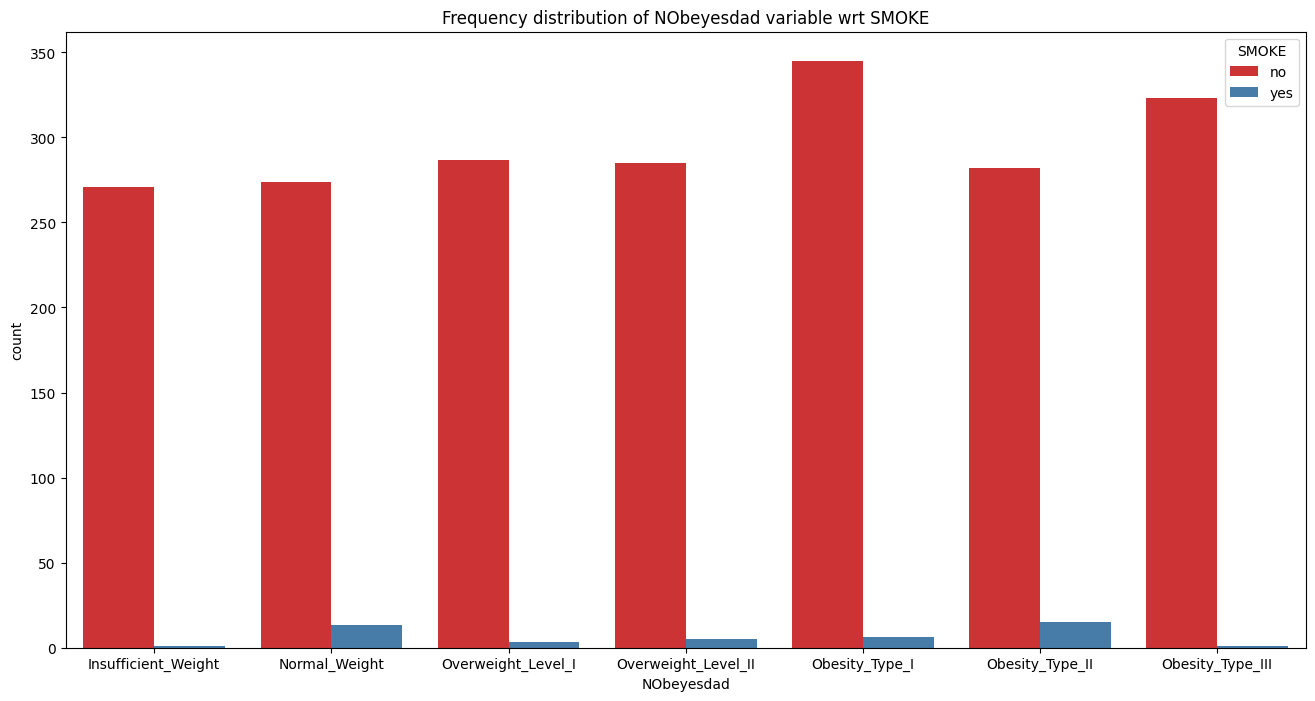

In [ ]:
#PLOT NObeyesdad vs Smoking habit
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="SMOKE", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt SMOKE")
plt.show()

#Workshop 3
#Ref [2] for order

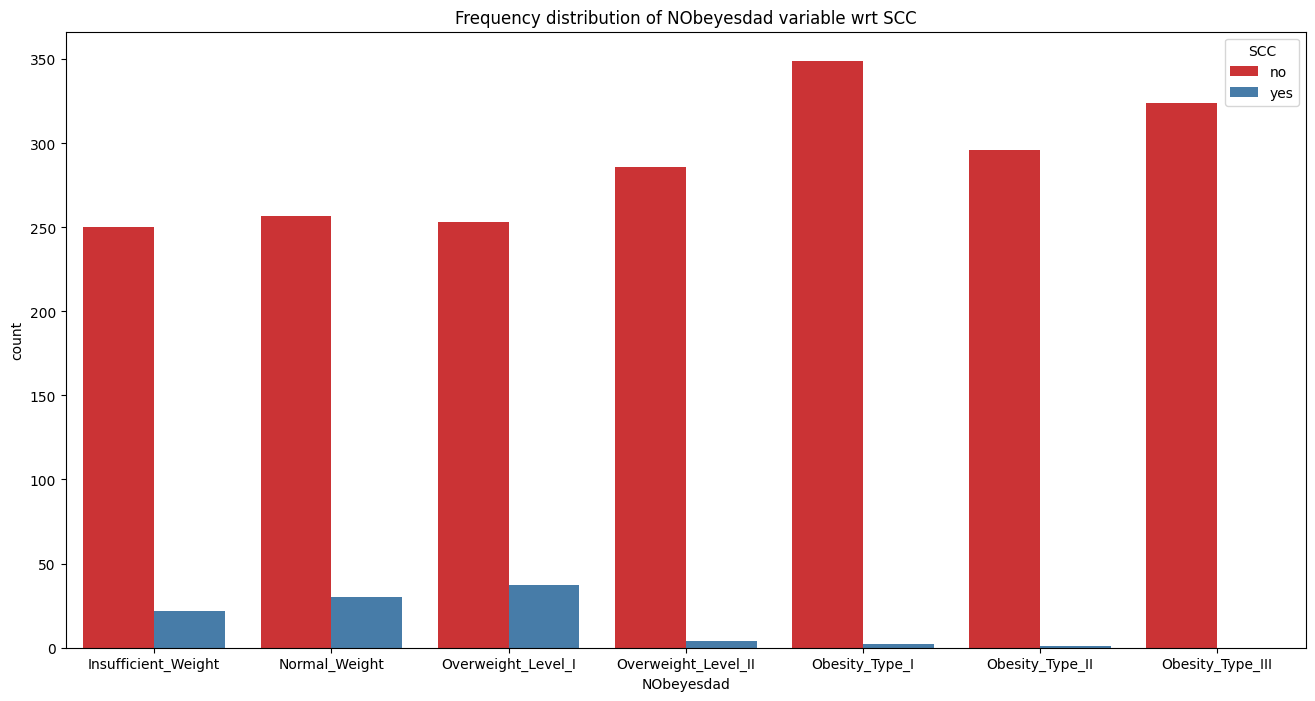

In [ ]:
#PLOT NObeyesdad vs Calories consumption monitoring (SCC)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="SCC", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt SCC")
plt.show()

#Workshop 3
#Ref [2] for order

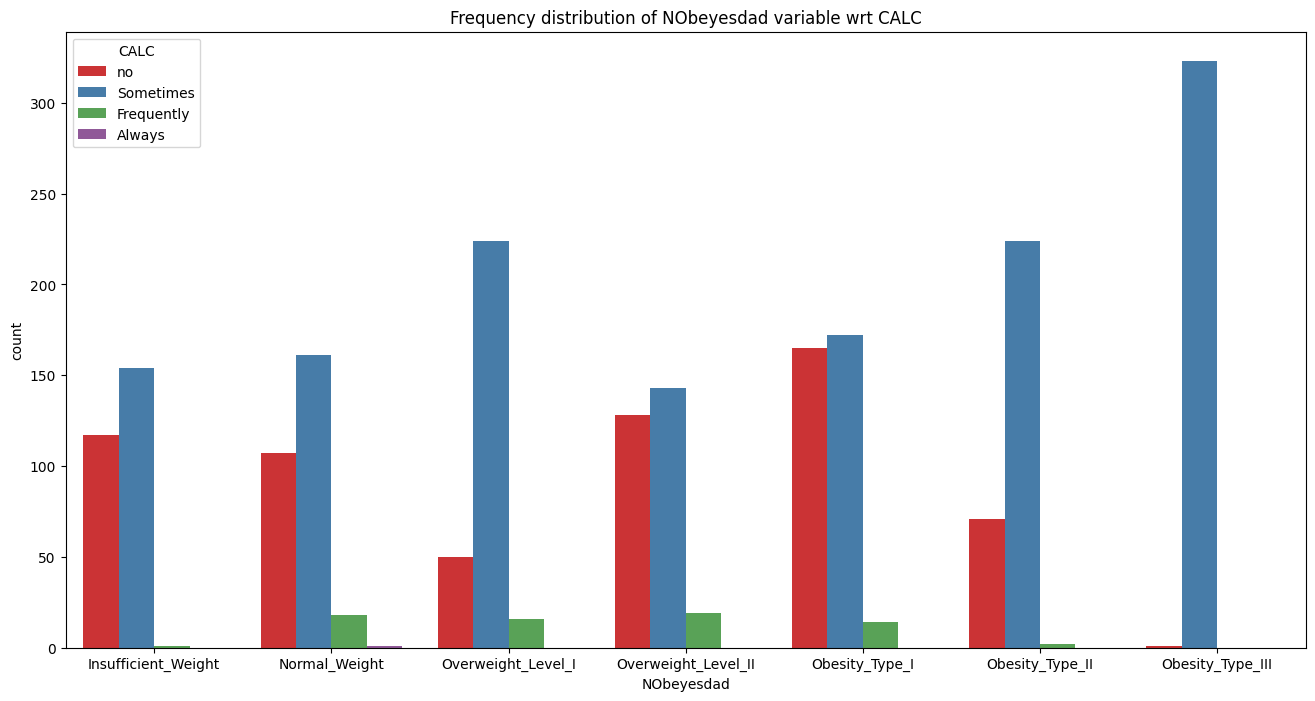

In [ ]:
#PLOT NObeyesdad vs Consumption of alcohol (CALC).
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="CALC", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt CALC")
plt.show()

#Workshop 3
#Ref [2] for order

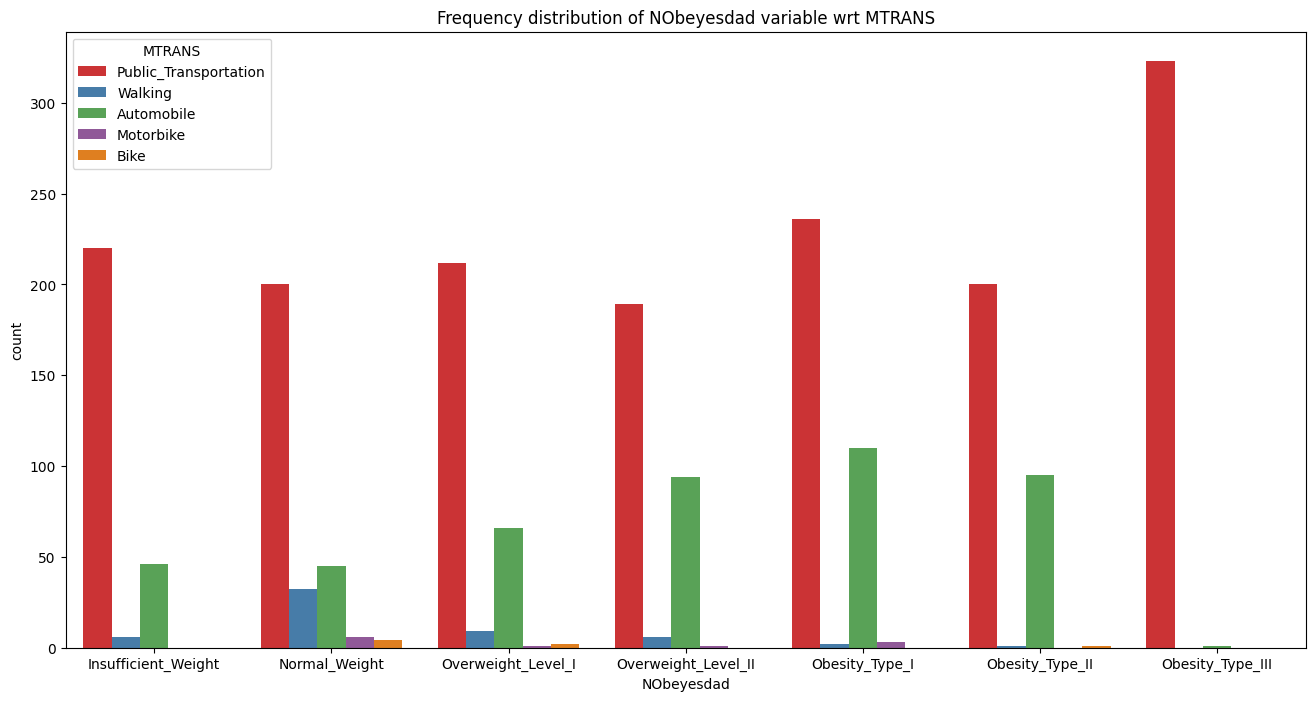

In [ ]:
#PLOT NObeyesdad vs Transportation used (MTRANS)
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.countplot(x="NObeyesdad", hue="MTRANS", data=data, palette="Set1", order=order)
ax.set_title("Frequency distribution of NObeyesdad variable wrt MTRANS")
plt.show()

#Workshop 3
#Ref [2] for order

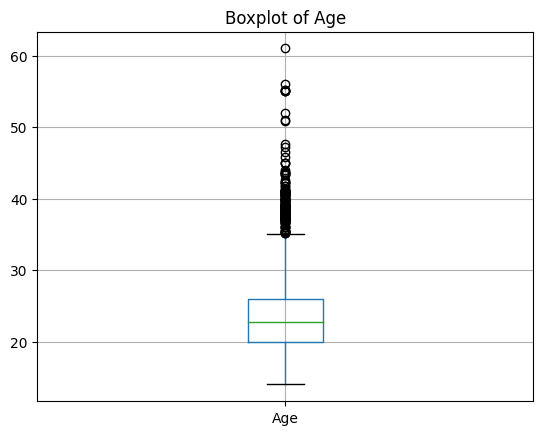

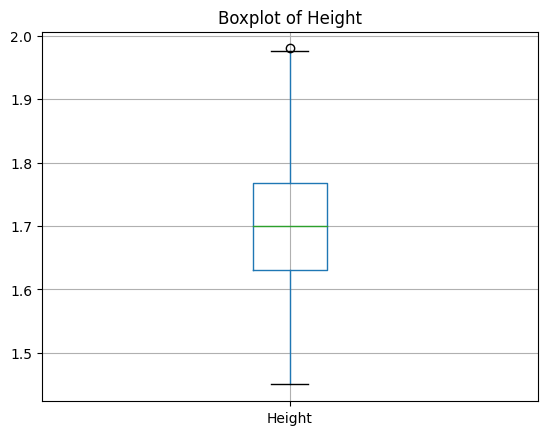

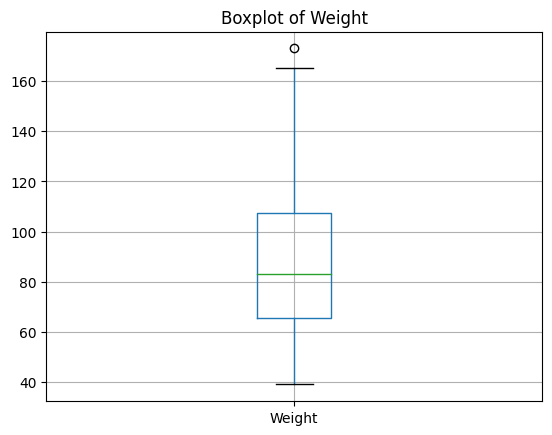

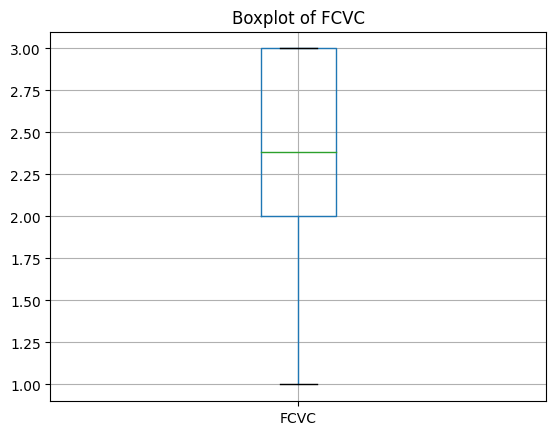

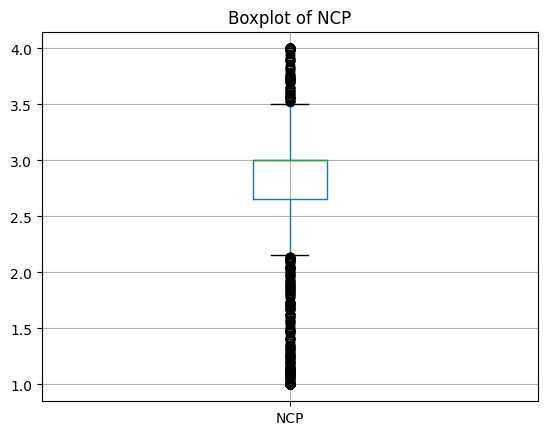

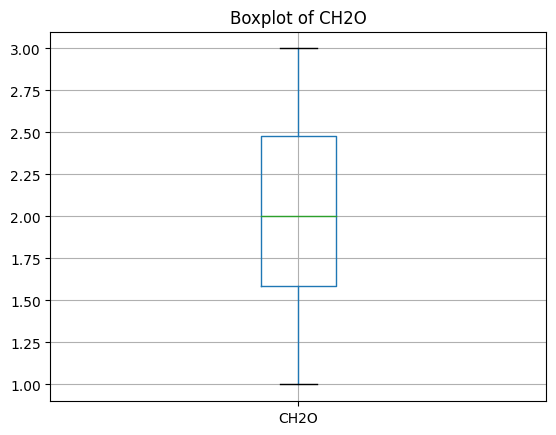

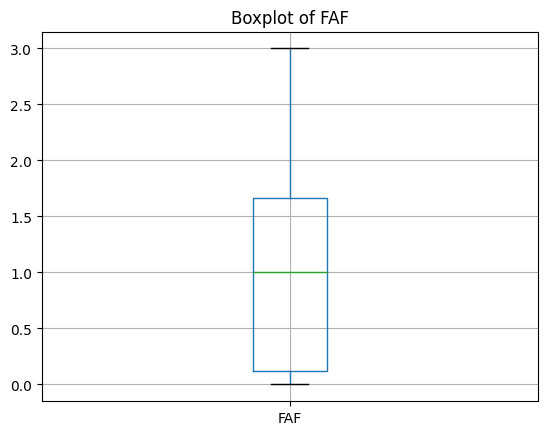

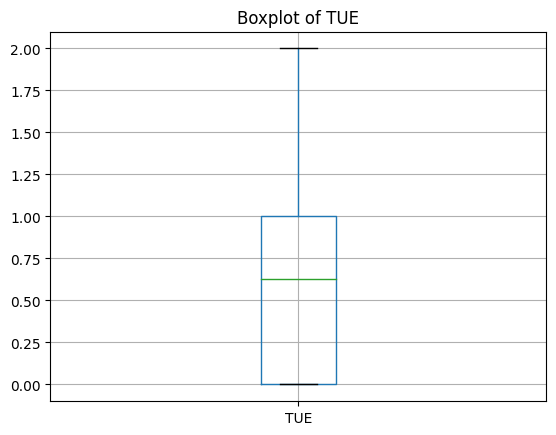

In [ ]:
#Plot boxplots for all the decimal variable columns
for col in decimal:
    plt.figure()
    data.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

#Workshop 3

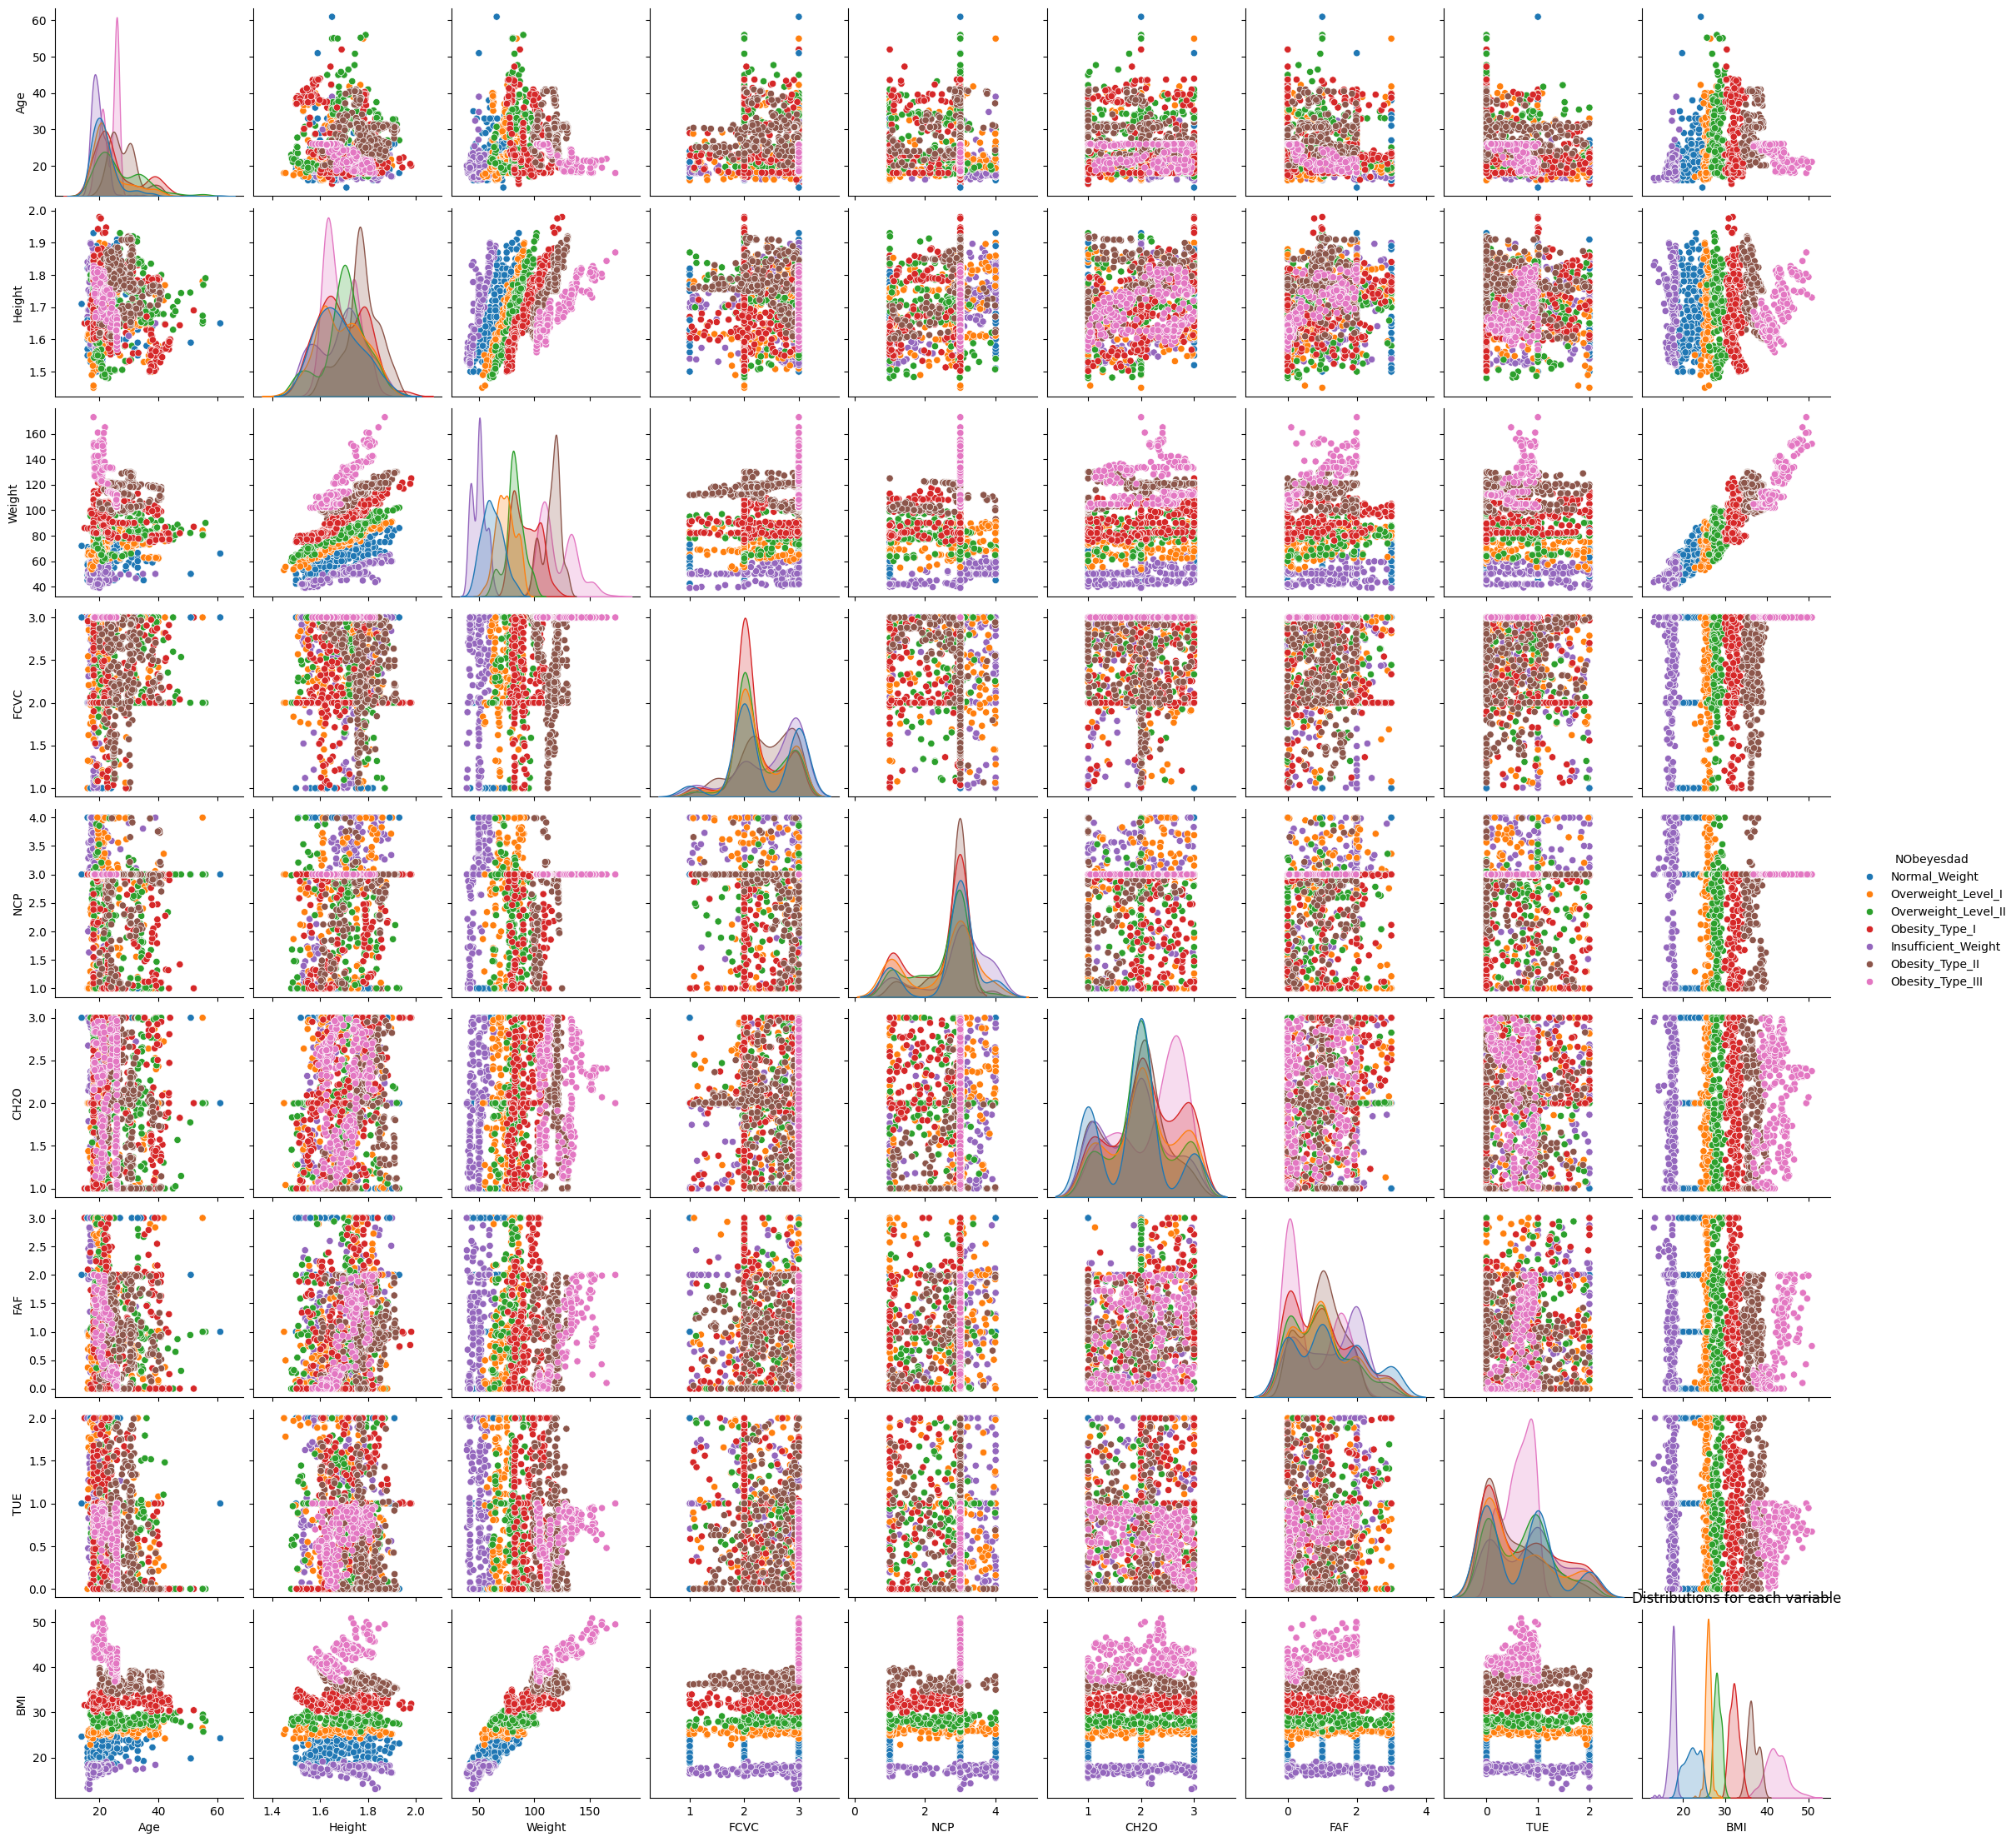

In [ ]:
sns.pairplot(data=data, hue="NObeyesdad")
plt.title('Distributions for each variable')
plt.show()

#Workshop 3

<ipython-input-92-65685d1c7a1f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


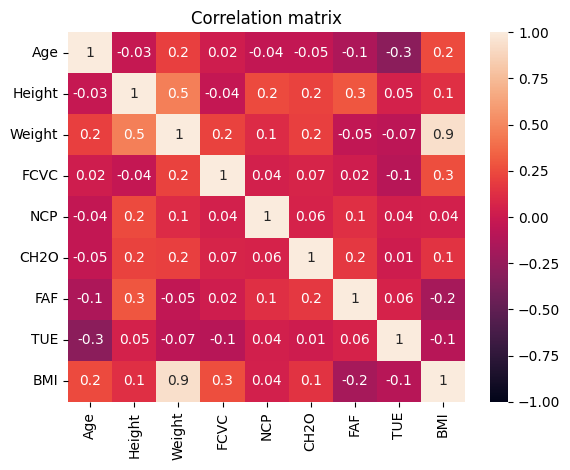

In [ ]:
#Plotting the heatmap to find correlation between the numeric variables
corr = data.corr()
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

#Workshop 3

###Data Analysis (200 words)
####Categorical vs. Frequency
FHWO and FAVC are prevalent, while CAEC indicates erratic eating habits. Smoking and alcohol consumption are minimal, and public transport is predominantly used.


####NObeyesdad
Even distribution of all categories in the dataset

####NObeyesdad vs. Categorical
FHWO and FAVC are prevalent among obese individuals, indicating hereditary and food intake is a key factor. CAEC also denotes that undeweight/normal indivdiuals follow a routine whereas obese people tend to have a more eratic schedule

####Pairplot & Heatmap
Strong correlations Age and BMI, Height and BMI, Height and Weight, and Weight vs BMI

####Data Dependencies
FHWO suggests genetic predisposition, while FAVC and CAEC highlight dietary habits' impact on obesity.
Age, Height, Weight are also strongly correlated with Obesity and BMI

###Models
SVM - SVM is suitable for classification tasks, making it appropriate for predicting obesity. It works well in high-dimensional spaces and is effective when the number of features exceeds the number of samples.

DT - Decision Trees are a good fit for predicting obesity because they're easy to understand, can handle different types of data, show how different factors affect obesity, and tell us which factors are most important for predicting obesity.

RF - Random Forest is suitable for predicting obesity because it combines multiple decision trees to improve accuracy, accommodates mixed data types, and provides information into feature importance for better understanding of obesity predictors.

### 3. Organise the data for modelling

In [ ]:
# convert into dummies for one-hot encoding
categorical_features= [var for var in data.columns if data[var].dtype=='O' and var != "NObeyesdad"]
test_data_dummies = pd.get_dummies(data, columns=categorical_features)
test_data_dummies.head()

#Workshop 3

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE           NObeyesdad  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0        Normal_Weight   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0        Normal_Weight   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0        Normal_Weight   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0   Overweight_Level_I   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0  Overweight_Level_II   

         BMI  ...  MTRANS_Bike  MTRANS_Motorbike  \
0  24.386526  ...            0                 0   
1  24.238227  ...            0                 0   
2  23.765432  ...            0                 0   
3  26.851852  ...            0                 0   
4  28.342381  ...            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  BMI_Category_Normal  \
0                             1               0                    1   
1                             1               0                    1   
2                             1               0                    1   
3                             0               1                    0   
4                             1               0                    0   

   BMI_Category_Obesity I  BMI_Category_Obesity II  BMI_Category_Obesity III  \
0                       0                        0                         0   
1                       0                        0                         0   
2                       0                        0                         0   
3                       0                        0                         0   
4                       0                        0                         0   

   BMI_Category_Overweight  BMI_Category_Underweight  
0                        0                         0  
1                        0                         0  
2                        0                         0  
3                        1                         0  
4                        1                         0  

[5 rows x 39 columns]

In [ ]:
#To change it to float for all
#For Scaling
features_all= [var for var in test_data_dummies.columns if var != "NObeyesdad"]
X=test_data_dummies[features_all].astype('float')
X=X.drop(['BMI'],axis=1)
X=X.drop(['SMOKE_no', 'SMOKE_yes'],axis=1)
X=X.drop(['BMI_Category_Normal', 'BMI_Category_Obesity I',
       'BMI_Category_Obesity II', 'BMI_Category_Obesity III',
       'BMI_Category_Overweight', 'BMI_Category_Underweight'],axis=1)

#Workshop 3

In [ ]:
X.head()

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0            1.0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0            1.0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0            0.0   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0            0.0   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0            0.0   

   Gender_Male  ...  SCC_yes  CALC_Always  CALC_Frequently  CALC_Sometimes  \
0          0.0  ...      0.0          0.0              0.0             0.0   
1          0.0  ...      1.0          0.0              0.0             1.0   
2          1.0  ...      0.0          0.0              1.0             0.0   
3          1.0  ...      0.0          0.0              1.0             0.0   
4          1.0  ...      0.0          0.0              0.0             1.0   

   CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0      1.0                0.0          0.0               0.0   
1      0.0                0.0          0.0               0.0   
2      0.0                0.0          0.0               0.0   
3      0.0                0.0          0.0               0.0   
4      0.0                0.0          0.0               0.0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                           1.0             0.0  
1                           1.0             0.0  
2                           1.0             0.0  
3                           0.0             1.0  
4                           1.0             0.0  

[5 rows x 29 columns]

In [ ]:
columns = X.columns
columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SCC_no',
       'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [ ]:
#Label Encoding for Categorical Values
y=data['NObeyesdad']
obesity_encoder = LabelEncoder()
y_encoded = obesity_encoder.fit_transform(y)
y_encoded

#Workshop 3

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
#Scaling
scaler = MinMaxScaler()
scaler.fit(X)

# Step 2: Transform your data using the fitted scaler
X = scaler.transform(X)

#Workshop 3

### 4. Implement prediction models

In [ ]:
X.shape,y.shape

((2111, 29), (2111,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_I': 290, 'Overweight_Level_II': 290, 'Normal_Weight': 287, 'Insufficient_Weight': 272})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.20,random_state=101,shuffle=True)

#Workshop 3

In [ ]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1688, 29)
X_test shape: (423, 29)
y_train shape: (1688,)
y_test shape: (423,)


In [ ]:
#SVC
svc = SVC(random_state=101)

#Workshop 3

In [ ]:
#Decision Tree Classifier
classifier_dt = DecisionTreeClassifier()

#Ref [4] for Decision Tree

In [ ]:
#Random Forest Classifier
classifier_rf = RandomForestClassifier()

#Ref [5] for Random Forest

###Test Methodology (100 words)
Cross Validation:

Cross-validation is a smarter way to train and test machine learning models compared to just splitting the data into two parts. It's like giving the model multiple chances to learn from different parts of the data. This helps us to make sure the model works well overall, not just on one particular split. By doing this, we can be more confident that the model will perform well on new, unseen data. Essentially, cross-validation is a more thorough and reliable method for evaluating machine learning models.

####Ref [7]

### 5. Train prediction models

In [ ]:
#SVC
accuracies_SVC = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train, y_train)

#Workshop 3

SVC(random_state=101)

In [ ]:
#DT
accuracies_dt = cross_val_score(classifier_dt, X_train, y_train, cv=5)
classifier_dt.fit(X_train, y_train)

#Workshop 3
#Ref [4] for Decision Tree

DecisionTreeClassifier()

In [ ]:
#RF
accuracies_rf = cross_val_score(classifier_rf, X_train, y_train, cv=5)
classifier_rf.fit(X_train, y_train)

#Workshop 3
#Ref [5] for Random Forest

RandomForestClassifier()

### 6. Test prediction models and show results

###Performance Metrics (200 words)

When dealing with a balanced dataset of obesity with multiple classes, opting for accuracy as the sole evaluation metric is justified due to several reasons.

Accuracy provides a straightforward measure of the model's overall correctness in predicting the weight categories. In a balanced dataset where each class is equally represented, accuracy gives equal weight to the correct prediction of each class, making it a suitable choice for assessing overall model performance.

At times where the goal is to achieve balanced performance across all classes without prioritizing specific classes over others, accuracy serves as an appropriate metric. It allows for evaluation of the model's ability to correctly classify instances into their respective weight categories without bias towards any particular class.

Focusing solely on accuracy simplifies the evaluation process and interpretation of results. By prioritizing accuracy, the emphasis is placed on achieving a high level of correctness in predicting weight categories.

####Ref[8]
####Ref[9]

In [ ]:
#SVC
svc_train_score = np.mean(accuracies_SVC)
svc_test_score = svc.score(X_test, y_test)
svc_test_result = svc.predict(X_test)

print("Train Score Array: ", accuracies_SVC)
print("Train Score:", svc_train_score)
print("Test Score:", svc_test_score)
#Workshop 3

Train Score Array:  [0.71893491 0.73668639 0.75147929 0.72106825 0.75074184]
Train Score: 0.7357821361473496
Test Score: 0.7494089834515366


In [ ]:
#DT
dt_train_score = np.mean(accuracies_dt)
dt_test_score = classifier_dt.score(X_test, y_test)
dt_test_result = classifier_dt.predict(X_test)

print("Train Score Array: ", accuracies_dt)
print("Train Score:", dt_train_score)
print("Test Score:", dt_test_score)

#Workshop 3
#Ref [4] for Decision Tree

Train Score Array:  [0.9260355  0.92899408 0.90828402 0.89910979 0.9347181 ]
Train Score: 0.919428300528506
Test Score: 0.9148936170212766


In [ ]:
#RF
rf_train_score = np.mean(accuracies_rf)
rf_test_score = classifier_rf.score(X_test, y_test)
rf_test_result = classifier_rf.predict(X_test)

print("Train Score Array:", accuracies_rf)
print("Train Score:", rf_train_score)
print("Test Score:", rf_test_score)
#Workshop 3 & 4
#Ref [5] for Random Forest

Train Score Array: [0.93786982 0.92899408 0.95857988 0.91691395 0.94362018]
Train Score: 0.9371955823222657
Test Score: 0.9456264775413712


### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

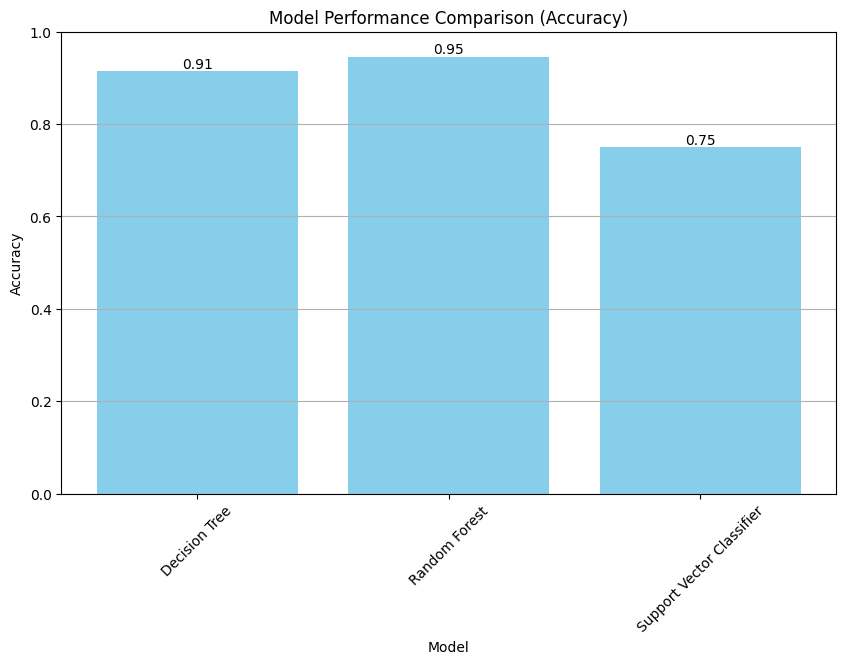

In [ ]:
# Define the models and their accuracy scores
models = ['Decision Tree', 'Random Forest','Support Vector Classifier']
accuracy_test_scores = [dt_test_score, rf_test_score, svc_test_score]

# Plotting the accuracy scores for each model
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_test_scores, color='skyblue')
plt.title('Model Performance Comparison (Accuracy)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')

# Adding value labels to each bar
for i, score in enumerate(accuracy_test_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

#Ref [6] for bar graph to compare
#Ref [10] for enumerate

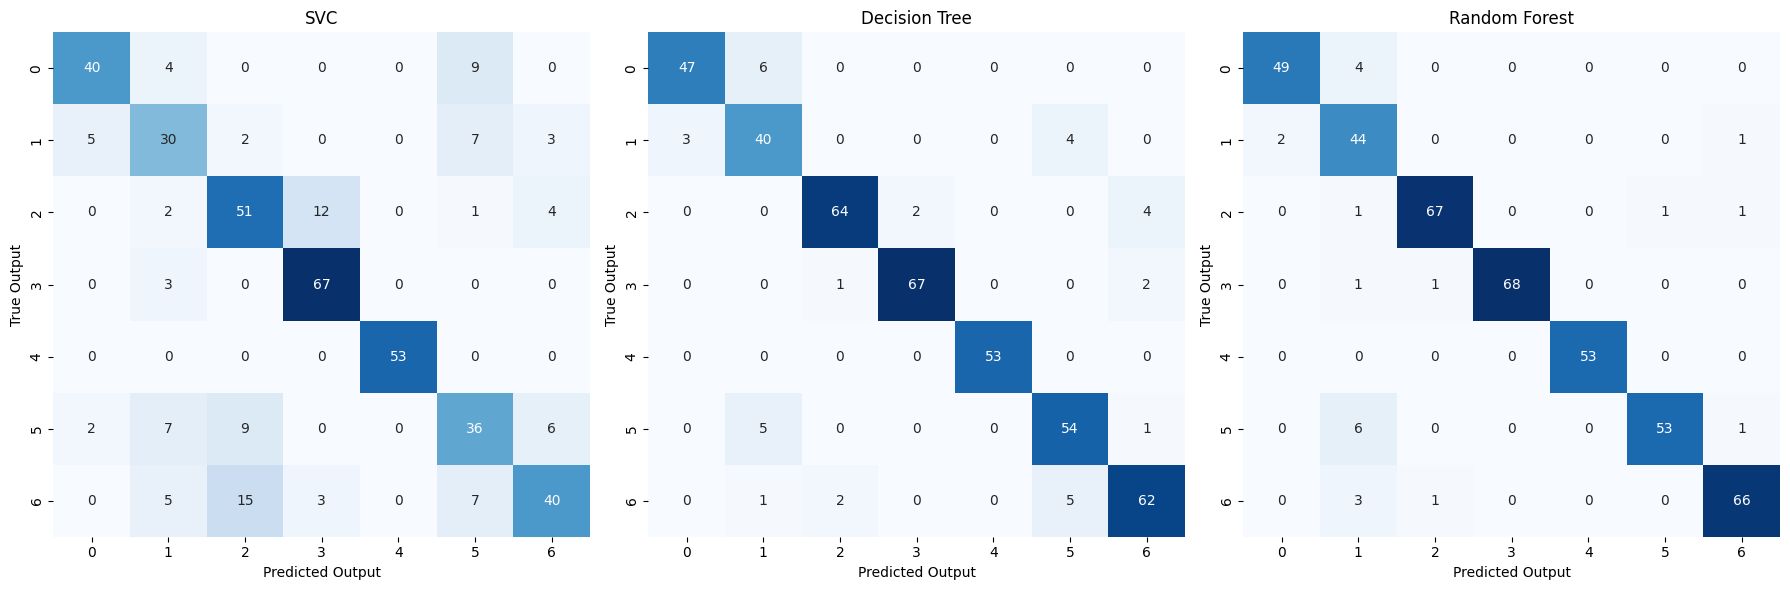

In [ ]:
confusion_svc = confusion_matrix(y_test, svc_test_result)
confusion_dt = confusion_matrix(y_test, dt_test_result)
confusion_rf = confusion_matrix(y_test, rf_test_result)
# Plot the heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVC')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted Output')
plt.ylabel('True Output')

plt.tight_layout()
plt.show()

#Workshop 4

In [ ]:
# Dictionary to store the accuracy scores of all models
accuracy_scores = {
    'SVC': svc_test_score,
    'Decision Tree': dt_test_score,
    'Random Forest': rf_test_score
}

# Select the best performing model based on accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)

# Show final results for the best performing model
print(f"The best performing model is: {best_model}")
print(f"Test Accuracy: {accuracy_scores[best_model]:.2f}")

#Ref [11] for max function

The best performing model is: Random Forest
Test Accuracy: 0.95


###Discussion (200 Words)

After training three models - Random Forest (RF), Decision Tree (DT), and Support Vector Machine (SVM) - using cross-validation testing and evaluating them with the test set, accuracy emerged as the primary metric for performance assessment. This choice was made by the balanced nature of the dataset and the need to accurately predict obesity categories.

Plotting a bar chart to visualize the results, it became evident that the Random Forest Classifier was the top-performing model, achieving a testing accuracy of 95%. The Decision Tree model followed closely with a testing accuracy of 91%. SVM lagged behind with an accuracy of 75%.

To further visualize the efficiency of the model, a heatmap is plotted to find the difference between the predicted outputs and actual test outputs. Random Forest out performs Decision Trees by a small margin, and is the best.

This disparity highlights the superiority of the Random Forest Classifier in accurately classifying individuals into obesity categories. With its outstanding performance and highest accuracy score, the Random Forest model stands out as the most suitable choice for this classification task, ensuring precise predictions and reliable insights into obesity classification.

### 8. Describe appropriate recommendations

Family history of overweight and high-caloric food consumption emerged as influential factors contributing to obesity, suggesting the importance of genetics and dietary habits. Additionally, the frequency of food consumption between meals highlighted the significance of consistent eating patterns in weight management.

When it comes to BMI, Age, Height, & Weight are closely correlated. One must ensure that these are all kept in check, by monitoring the calorie intake and doing exercises frequently. Encouraging individuals to adopt balanced and nutritious diets, monitor portion sizes, and maintain regular meal timings could promote healthier eating habits. Furthermore, promoting physical activity and discouraging use of vehicles, such as excessive public transport usage, could help combat obesity.

Awareness campaigns and educational programs aimed at raising awareness about the importance of maintaining a healthy weight, making informed dietary choices, and engaging in regular physical activity could help individuals to take proactive steps towards obesity prevention and management. By addressing these key factors to health and wellness, governments and public health agencies can contribute to reducing the prevalence of obesity and improving overall population health.

### 9. Reflect on what you have learned by completing this assignment

Completing this assignment has been a valuable learning experience, enhancing my understanding of various aspects of data analysis and machine learning. Through this assignment, I gained knowledge in data visualization techniques, including the use of different plots to explore and analyze categorical and numerical data. I learned to interpret trends and patterns in the data through observation and analysis of graphs, enabling me to derive meaningful insights.

Moreover, I developed a deeper understanding of data preprocessing techniques, such as encoding categorical variables, to prepare the data for model training. The need to preprocess data to get it ready for the model is important.

Selecting appropriate machine learning models based on the nature of the data and the problem at hand is vital in Machine Learning. I learned about the importance of using suitable performance metrics, such as accuracy, precision and recall (only accuracy was used), particularly in the context of balanced and imbalanced datasets.

I gained knowledge of different testing methodologies, such as k-fold cross-validation, to evaluate model performance effectively.

Overall, completing this assignment has expanded my skills in data science and programming, equipping me to explore and analyze diverse datasets more confidently in the future.

### 10. References

[1] https://seaborn.pydata.org/generated/seaborn.distplot.html

[2] https://seaborn.pydata.org/generated/seaborn.countplot.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[5] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[6] https://www.mathworks.com/help/matlab/ref/bar.html

[7] https://datascientest.com/en/the-importance-of-cross-validation

[8] https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#accuracy-precision-and-recall-in-ml-monitoring

[9] https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

[10] https://www.w3schools.com/python/ref_func_enumerate.asp

[11] https://www.w3schools.com/python/ref_func_max.asp